In [25]:
#Loading the imdb dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [24]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
#Decoding reviews back to text
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [6]:
#Preparing the data
#Encoding the integer sequences via multi-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [9]:
#BUILDING YOUR MODEL
#Model definition
#using 3 layers and 64 nodes in this model. Instead of "ReLU," the activation function "tanh" is utilized.
#The ReLU function's ranges from 0-infinity, hence it is not appropriate for problems where negative values are crucial. 
#Given that it has a range of -1 to +1 with zero acting as the midpoint, the Tanh function works well for models with both positive and negative values.

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers


model = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005),activation="tanh"),
    layers.Dense(64,activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64,activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [10]:
#compiling the model
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [11]:
#validating hte approach
#setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
#training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 96ms/step - loss: 0.5242 - accuracy: 0.7329 - val_loss: 0.2947 - val_accuracy: 0.8222
Epoch 2/20
30/30 [==============================] - 3s 101ms/step - loss: 0.2189 - accuracy: 0.8535 - val_loss: 0.1962 - val_accuracy: 0.8320
Epoch 3/20
30/30 [==============================] - 3s 87ms/step - loss: 0.1492 - accuracy: 0.8824 - val_loss: 0.1439 - val_accuracy: 0.8678
Epoch 4/20
30/30 [==============================] - 2s 73ms/step - loss: 0.1394 - accuracy: 0.8786 - val_loss: 0.1434 - val_accuracy: 0.8666
Epoch 5/20
30/30 [==============================] - 2s 75ms/step - loss: 0.1199 - accuracy: 0.8995 - val_loss: 0.1418 - val_accuracy: 0.8646
Epoch 6/20
30/30 [==============================] - 2s 72ms/step - loss: 0.1154 - accuracy: 0.9019 - val_loss: 0.1268 - val_accuracy: 0.8801
Epoch 7/20
30/30 [==============================] - 2s 73ms/step - loss: 0.1134 - accuracy: 0.9021 - val_loss: 0.1336 - val_accuracy: 0.8684
Epoch 8/20
3

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

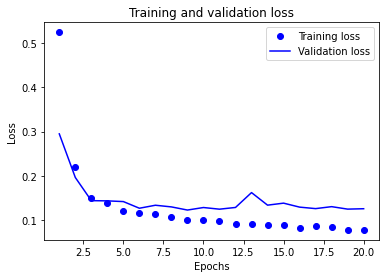

In [14]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

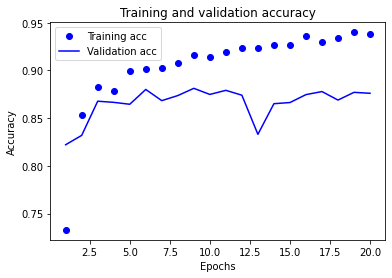

In [15]:
#plotting the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [16]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 5s 6ms/step - loss: 0.1313 - accuracy: 0.8680


In [17]:
results

[0.13130024075508118, 0.8679599761962891]

In [18]:
#I've observed that the model with more nodes looks to be more stable. 
#The models stated above have different levels and functionalities. The training accuracy is still higher for each of these models.
# I was able to get some of the greatest results using multiple layers and the MSE loss function.

In [19]:
#Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005),activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 4s 56ms/step - loss: 0.3554 - accuracy: 0.7861
Epoch 2/4
49/49 [==============================] - 3s 56ms/step - loss: 0.1549 - accuracy: 0.8908
Epoch 3/4
49/49 [==============================] - 3s 56ms/step - loss: 0.1469 - accuracy: 0.8984
Epoch 4/4
782/782 [==============================] - 4s 4ms/step - loss: 0.1656 - accuracy: 0.8727


In [20]:
results

[0.16555257141590118, 0.8727200031280518]